# Minimal analysis
---

#### Overview
Processes timelapse data from intrinsic imaging experiments on mice.

#### Outline
1. Collect experimental data and process csv

#### Packages

In [1]:
from pathlib import Path

from natsort import natsorted
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, filters

#### Local modules

In [2]:
import sys

dir_code = "../scripts/"
if dir_code not in sys.path:
    sys.path.insert(-1, dir_code)

from parse_csv import (
    parse_csv,
    process_data
)

## Collect experimental data and process csv

#### Parse csv

In [3]:
# location where all experimental data is kept
dir_experiments = Path("/Users/ryanlane/Projects/brain_imaging/data_experimental/")

# path to a particular (or set of) experiment(s) for analysis
date = "2024-02-14"
expt = "exp3_1"
fp_csv = natsorted((dir_experiments/date/expt).glob("*.csv"))[0]
fp_tif = natsorted((dir_experiments/date/expt).glob("*.tif"))[0]

# parse csv and show a preview
df_daq = parse_csv(fp_csv)
df_daq.head(8)

,time,camera,LED1,LED2,stim
0,0.0000,0.058552,0.005713,0.344660,0.237692
1,0.0002,0.058552,0.005713,0.419409,0.268622
2,0.0004,0.058552,0.004424,0.455495,0.273777
3,0.0006,0.058552,0.005713,0.483848,0.316307
4,0.0008,0.058552,0.005713,0.503179,0.320173
5,0.0010,0.058552,0.005713,0.523800,0.351104
6,0.0012,0.058552,0.005713,0.536687,0.353681
7,0.0014,0.058552,0.005713,0.548286,0.392345


#### Process csv

In [4]:
df_frames = process_data(
    df_daq,
    col_camera="camera",
    col_stim="stim"
)

# show preview of processed DataFrame around a stimulation event
i_stim = df_frames.loc[df_frames["stimulated"], "frame"].iloc[0]
df_frames.iloc[i_stim-5:i_stim+3]

,frame,stimulated,time,frametime,framerate
28665,10,False,5.7330,0.2002,4.995005
29666,11,False,5.9332,0.2002,4.995005
30667,12,False,6.1334,0.2002,4.995005
31668,13,False,6.3336,0.2000,5.000000
32668,14,True,6.5336,0.2002,4.995005
33669,15,True,6.7338,0.2002,4.995005
34670,16,True,6.9340,0.2002,4.995005
35671,17,True,7.1342,0.2002,4.995005


#### Load timelapse

In [5]:
stack = io.imread(fp_tif)

## Temporal filtering (WIP)

Still not sure what is best here...

## Math

In [6]:
frames_base = df_frames.loc[~df_frames["stimulated"], "frame"].values
frames_stim = df_frames.loc[df_frames["stimulated"], "frame"].values

stack_base = stack[frames_base-1]
stack_stim = stack[frames_stim-1]

tproj_base = stack_base.mean(axis=0)
tproj_stim = stack_stim.mean(axis=0)

image_diff = tproj_stim - tproj_base

## Plotting

Simplest little plot ya ever did see.

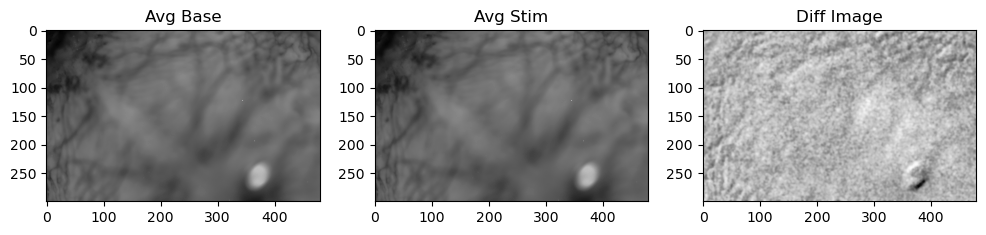

In [8]:
# images to plot
images = {
    "Avg Base": tproj_base,
    "Avg Stim": tproj_stim,
    "Diff Image": filters.gaussian(image_diff, sigma=1.6)
}

# create figure
ncols = len(images)
fig, axes = plt.subplots(
    ncols=ncols,
    figsize=(4*ncols, 3)
)
for (title, image), ax in zip(images.items(), axes):
    ax.imshow(image, cmap="Greys_r")
    ax.set_title(title)